### Import Libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd # Data processing, I/0 operations
import matplotlib.pyplot as plt #plotting
import seaborn as sns

%matplotlib inline

### Loading and reviewing our dataset

In [2]:
data = pd.read_csv("/content/dataset.csv")

In [3]:
data.shape

(768, 11)

In [4]:
data.head()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 10
0,2,6,148,72,35,0,33.6,0.627,50,1,NaN
1,3,1,85,66,29,0,26.6,0.351,31,0,NaN
2,4,8,183,64,0,0,23.3,0.672,32,1,NaN
3,5,1,89,66,23,94,28.1,0.167,21,0,NaN
4,6,0,137,40,35,168,43.1,2.288,33,1,NaN


### Data Preprocessing

In [5]:
data.isnull().values.any()

True

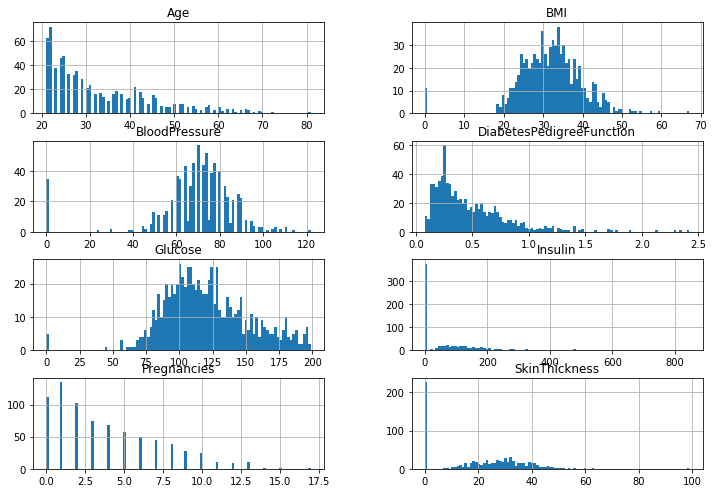

In [ ]:
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))
plt.show()

### Correlation

In [6]:
data.corr()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 10
1,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184,NaN
Pregnancies,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,NaN
Glucose,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,NaN
BloodPressure,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,NaN
SkinThickness,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,NaN
Insulin,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,NaN
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,NaN
DiabetesPedigreeFunction,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,NaN
Age,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,NaN
Outcome,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,NaN


In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

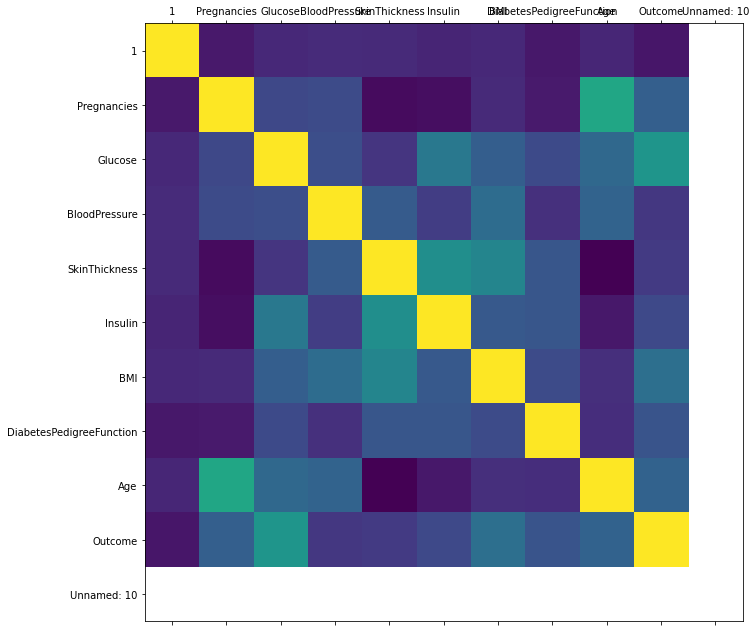

In [8]:
plot_corr(data)

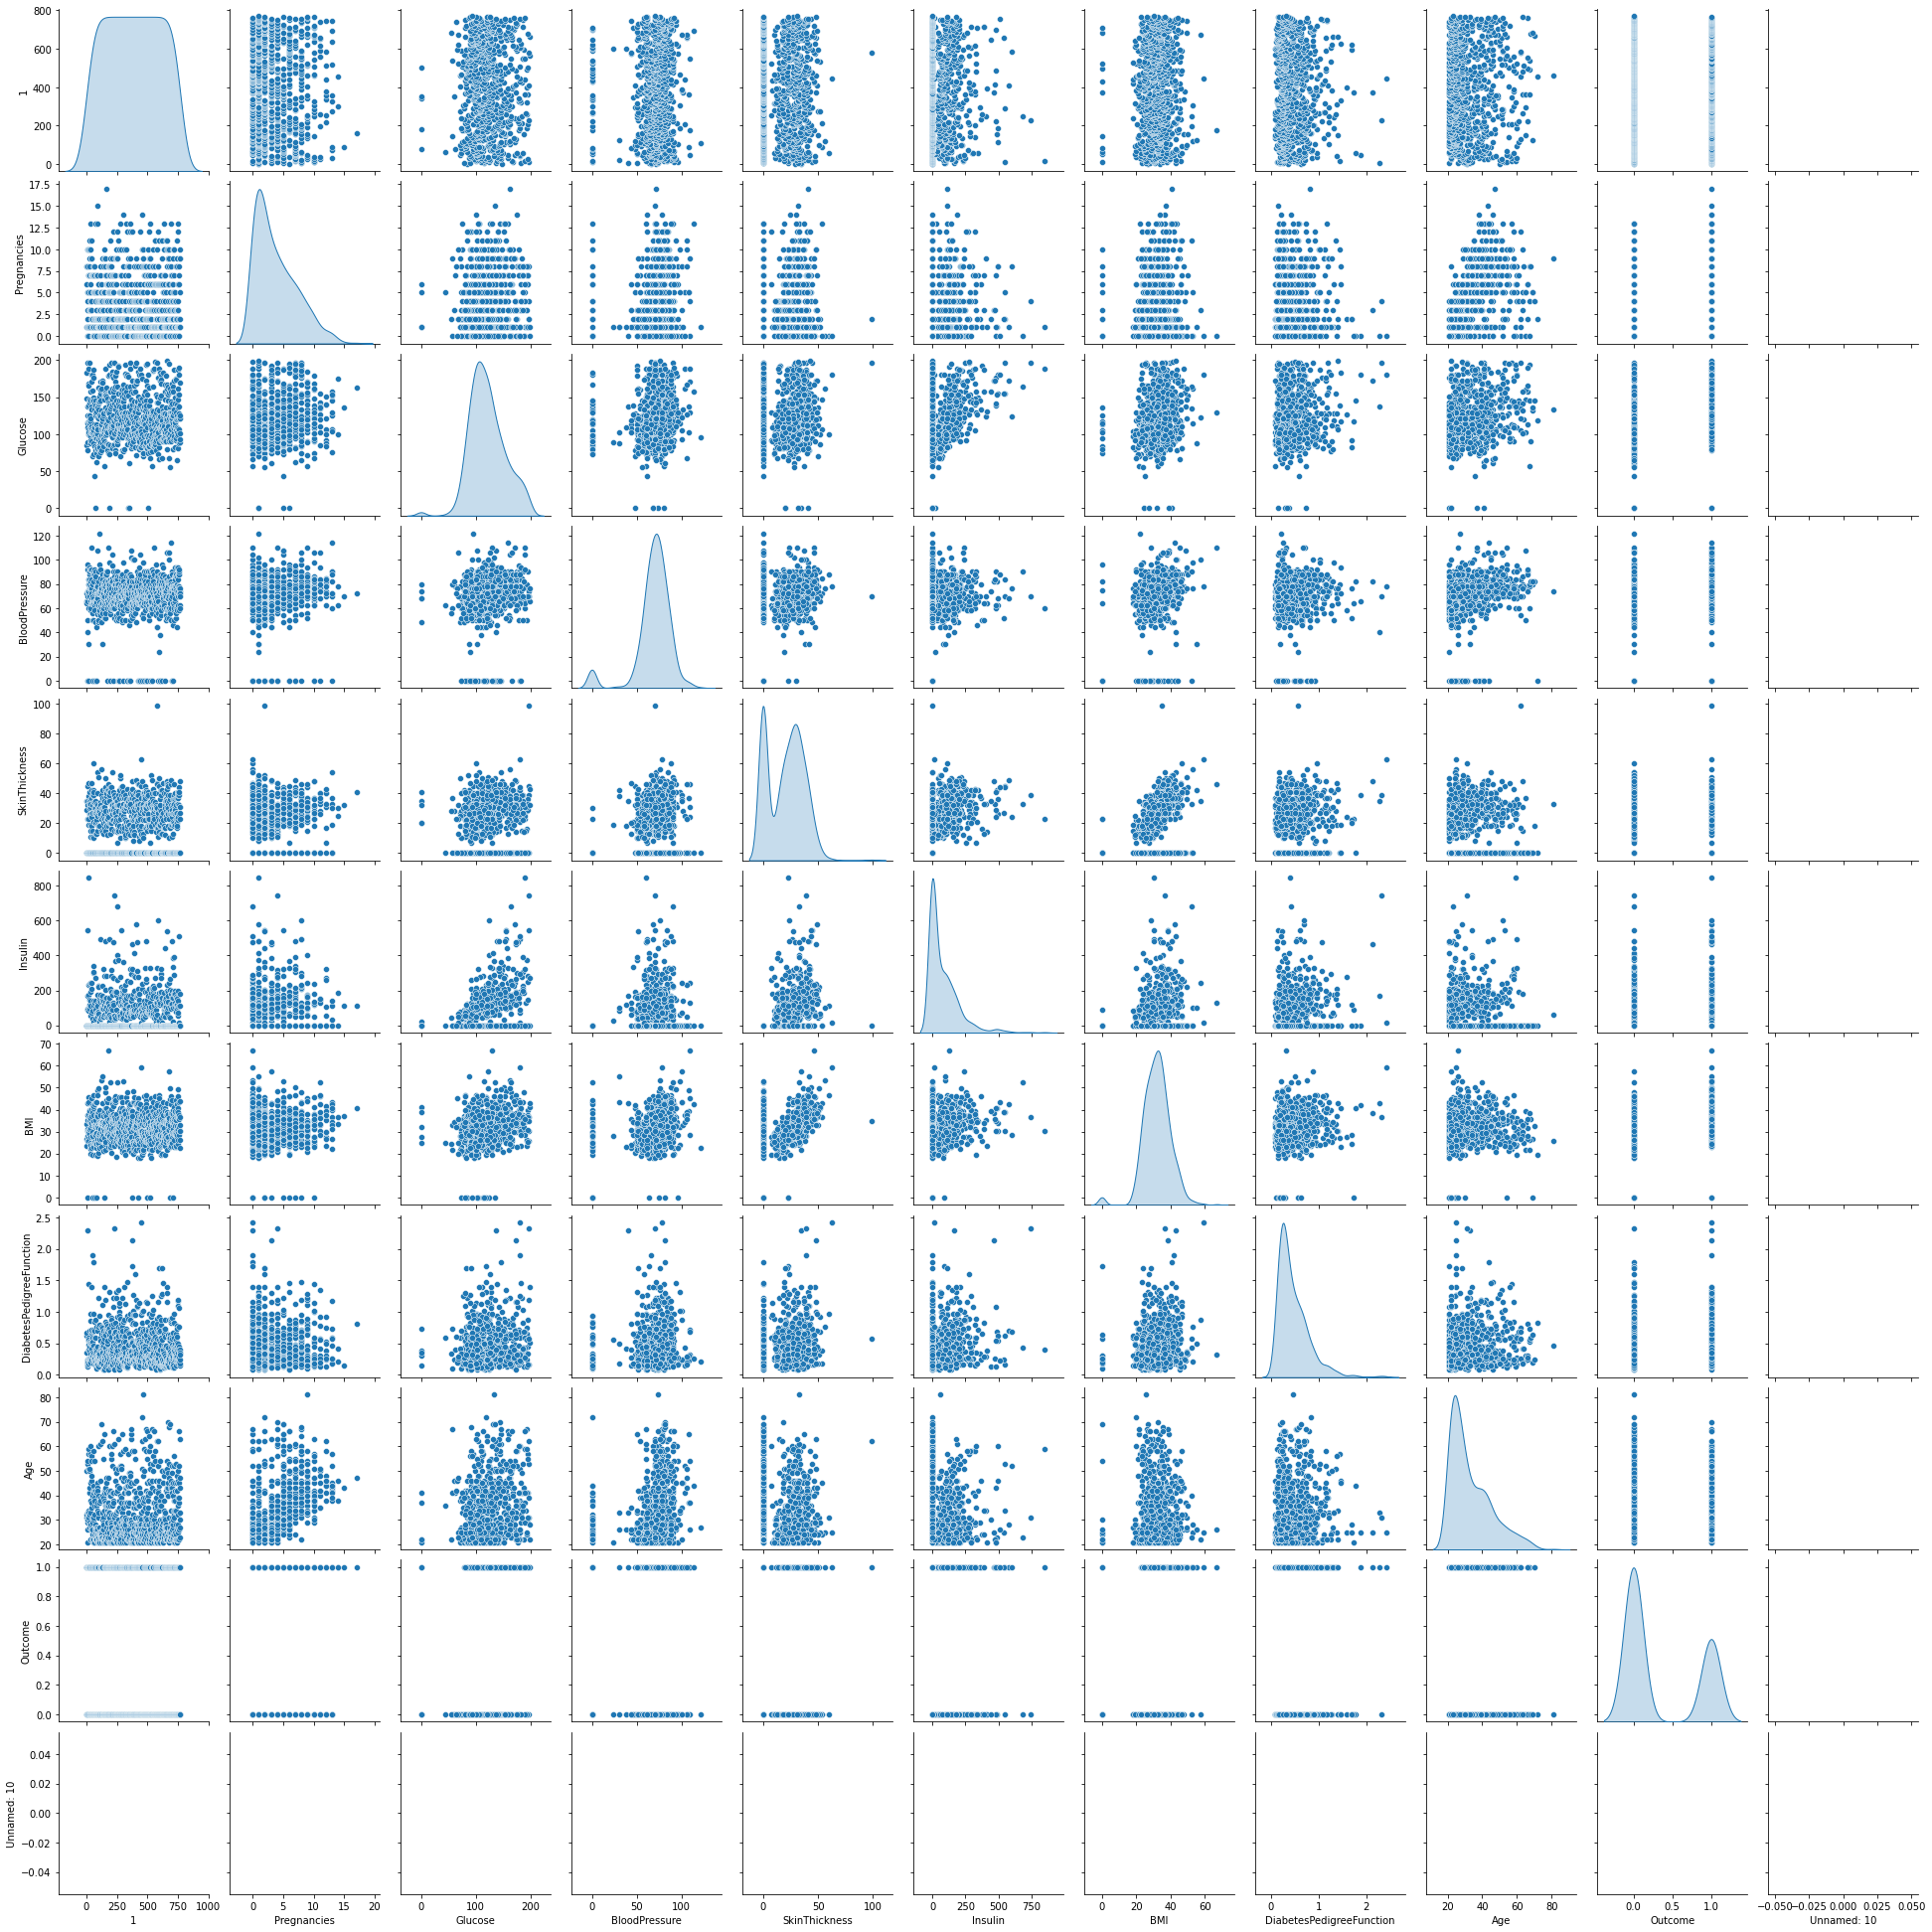

In [9]:
sns.pairplot(data, diag_kind='kde')

### Calculate ratio of True/False from the outcome variable

In [10]:
n_true = len(data.loc[data['Outcome']==True])
n_false = len(data.loc[data['Outcome']==False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, ((n_true/(n_true+n_false))*100)))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, ((n_false/(n_true+n_false))*100)))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


### Split the data into train and test set

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1) # 70-30 data split
x_train.head()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Unnamed: 10
88,90,15,136,70,32,110,37.1,0.153,43,NaN
467,469,0,97,64,36,100,36.8,0.600,25,NaN
550,552,1,116,70,28,0,27.4,0.204,21,NaN
147,149,2,106,64,35,119,30.5,1.400,34,NaN
481,483,0,123,88,37,0,35.2,0.197,29,NaN


In [13]:
Y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
print("{0:0.2f}% data in the training set".format((len(x_train)/len(data.index))*100))
print("{0:0.2f}% data in the test set".format((len(x_test)/len(data.index))*100))

69.92% data in the training set
30.08% data in the test set


### Now lets check what the True/False ratio is in train and test datasets

In [15]:
print("Original Diabetes True values: {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome']==1]), 
      (len(data.loc[data['Outcome']==1])/len(data.index))*100))

print("Original Diabetes False values: {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome']==0]), 
      (len(data.loc[data['Outcome']==0])/len(data.index))*100))

Original Diabetes True values: 268 (34.90%)
Original Diabetes False values: 500 (65.10%)


In [16]:
print("Training Diabetes true values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==1]), 
      (len(y_train[y_train[:]==1])/len(y_train))*100))

print("Training Diabetes False values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==0]), 
      (len(y_train[y_train[:]==0])/len(y_train))*100))

Training Diabetes true values: 183 (34.08%)
Training Diabetes False values: 354 (65.92%)


In [17]:
print("Test Diabetes true values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==1]), 
      (len(y_test[y_test[:]==1])/len(y_test))*100))

print("Test Diabetes False values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==0]), 
      (len(y_test[y_test[:]==0])/len(y_test))*100))

Test Diabetes true values: 85 (36.80%)
Test Diabetes False values: 146 (63.20%)


### Finalize the dataset

In [21]:
x_train.head()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Unnamed: 10
88,90,15,136,70,32,110,37.1,0.153,43,NaN
467,469,0,97,64,36,100,36.8,0.600,25,NaN
550,552,1,116,70,28,0,27.4,0.204,21,NaN
147,149,2,106,64,35,119,30.5,1.400,34,NaN
481,483,0,123,88,37,0,35.2,0.197,29,NaN


In [ ]:
x_train=x_train.drop("Unnamed: 10",axis=1)

In [26]:
x_train.head()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,90,15,136,70,32,110,37.1,0.153,43
467,469,0,97,64,36,100,36.8,0.600,25
550,552,1,116,70,28,0,27.4,0.204,21
147,149,2,106,64,35,119,30.5,1.400,34
481,483,0,123,88,37,0,35.2,0.197,29


In [37]:
x_train = x_train.fillna(0,axis=1)

In [39]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=np.nan, strategy="mean")
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

In [40]:
x_train.columns = cols
x_test.columns = cols

In [41]:
x_train.head()

,0,1,2,3,4,5,6,7,8
0,90.0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,469.0,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,552.0,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,149.0,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,483.0,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


## Build and train Naive Bayes algorithm

In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1e-7)
model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-07)

In [62]:
model_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, model_predict)))

Model Accuracy: 0.7393


### Perfomance of our model on testing data

In [63]:
model_test_predict = model.predict(x_test)

print("Model Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, model_test_predict)))

Model Accuracy: 0.7749


### Confusion matrix

Confusion Matrix


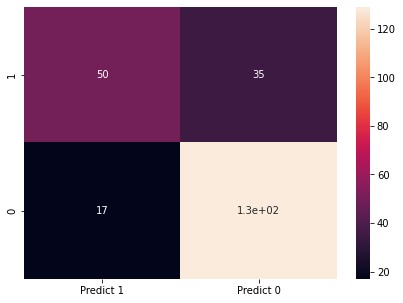

In [60]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, model_test_predict, labels=[1,0])
data_cm = pd.DataFrame(cm, index = [i for i in ['1', '0']],
                      columns=[i for i in ['Predict 1', 'Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(data_cm, annot=True)
plt.show()

In [46]:
print("Classification report")
print(metrics.classification_report(y_test, model_test_predict, labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.75      0.59      0.66        85
           0       0.79      0.88      0.83       146

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

